In [1]:
class Particle:
    mass=1
    
    def __init__(self, mass,position,velocity):
        self.mass=mass
        self.position=position
        self.velocity=velocity
        
    #make a square boundary from (0,0) to (1,1)
    def reflect(self,position,velocity)
        if (position[0]+position[1]==1) & (position[0]==0 or position[1]==0):
            velocity=
        

SyntaxError: invalid syntax (4291353190.py, line 10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Particle:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = position
        self.velocity = velocity

    def __update_position(self, time_step):
        # Update position based on velocity
        self.position += self.velocity * time_step

    def apply_force(self, force, time_step):
        # Update velocity based on force
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Privately update position
        self.__update_position(time_step)

# Parameters
mass = 1.0
initial_position = 0.0
initial_velocity = 1.0
force = 0.5
time_step = 0.1
num_steps = 100

# Create a Particle instance
particle = Particle(mass=mass, position=initial_position, velocity=initial_velocity)

# Prepare data for animation
positions = []

for _ in range(num_steps):
    particle.apply_force(force, time_step)
    positions.append(particle.position)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, num_steps * time_step)
ax.set_ylim(min(positions), max(positions))
line, = ax.plot([], [], lw=2)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = np.linspace(0, i * time_step, i+1)
    y = positions[:i+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=num_steps, interval=50, blit=True)

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Motion Simulation')
plt.show()


In [ ]:
%matplotlib notebook


# Single Particle

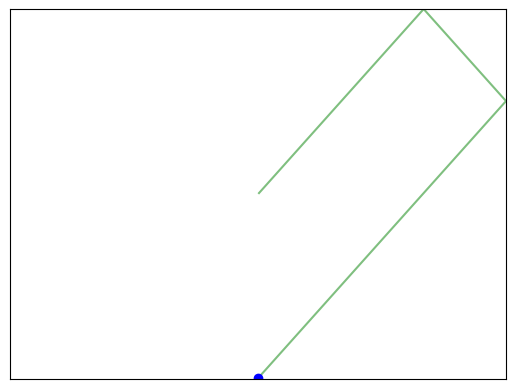

In [3]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Particle:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)

    def update_position(self, time_step):
        # Update position based on velocity
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            if self.position[i] <= 0 or self.position[i] >= 1:
                self.velocity[i] = -self.velocity[i]  # Reflect the velocity

    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force
        self.update_position(time_step)

# Parameters
mass = 1.0
initial_position = [0.5, 0.5]  # Start in the middle of the grid
initial_velocity = [0.2, 0.3]
force = np.array([0, 0])  # No external force applied
time_step = 0.01
num_steps = 500

# Create a Particle instance
particle = Particle(mass=mass, position=initial_position, velocity=initial_velocity)

# Prepare data for animation
positions = []

for _ in range(num_steps):
    particle.apply_force(force, time_step)
    positions.append(particle.position.copy())

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Animation function
def animate(i):
    ax.clear()  # Clear the axis to prevent flashing
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Update particle position and trail
    x = [pos[0] for pos in positions[:i+1]]
    y = [pos[1] for pos in positions[:i+1]]
    ax.plot(x, y, 'g-', alpha=0.5)  # Trail
    ax.plot(positions[i][0], positions[i][1], 'bo-')  # Particle
    
    return ax

# Create the animation
ani = FuncAnimation(fig, animate, frames=num_steps, interval=2.5, blit=False)

ani.save('particle_motion.mp4')

plt.show()


# Multiple Particles

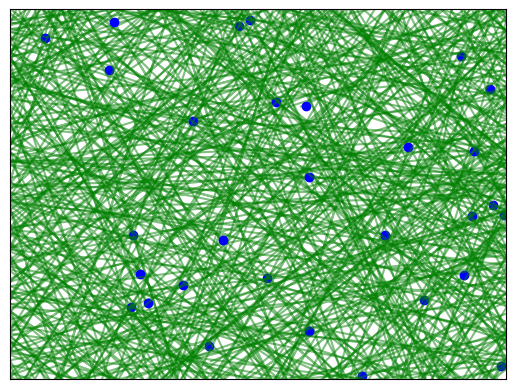

In [4]:



import numpy as np
particles={}
num_particles=30
for i in range(num_particles):
    particles[f"x{i}"]=Particle(mass=mass, position=np.array([np.random.rand(), np.random.rand()]), velocity=10*np.random.rand()*np.array([np.random.rand(),np.random.rand()]))
    

positions=np.zeros((num_particles,2,num_steps))

for j in range(num_steps):
    for i in range(num_particles):
        
        cvar=particles[f"x{i}"]
        
        cvar.apply_force(force, time_step)
        loc = cvar.position.copy()
        
        positions[i,0,j]=loc[0]
        positions[i,1,j]=loc[1]

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

def animate(i):
    ax.clear()  # Clear the axis to prevent flashing
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Update particle position and trail
    for particlesss in range(num_particles):
        x = [pos for pos in positions[particlesss,0,:i+1]]
        y = [pos for pos in positions[particlesss,1,:i+1]]
        ax.plot(x, y, 'g-', alpha=0.5)  # Trail
        ax.plot(positions[particlesss,0,i], positions[particlesss,1,i], 'bo-')  # Particle
    
    return ax
   
    
ani = FuncAnimation(fig, animate, frames=num_steps, interval=2.5, blit=False)
ani.save('/Users/henryschnieders/downloads/animation.mp4')
plt.show()

# Continuous Plotting


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Particle:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)

    def update_position(self, time_step):
        # Update position based on velocity
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            if self.position[i] <= 0 or self.position[i] >= 1:
                self.velocity[i] = -self.velocity[i]  # Reflect the velocity

    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force
        self.update_position(time_step)

# Parameters
mass = 1.0
num_particles = 100
time_step = 0.01
num_steps = 5000
max_vel=5
force = np.array([0, 0])  # No external force applied

# Initialize particles
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2)
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for j in range(num_steps):
    for i in range(num_particles):
        cvar = particles[f"x{i}"]
        cvar.apply_force(force, time_step)
        loc = cvar.position.copy()
        positions[i, 0, j] = loc[0]
        positions[i, 1, j] = loc[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5)[0] for _ in range(num_particles)]  # Particle markers
trails = [ax.plot([], [], 'g-', alpha=0.5)[0] for _ in range(num_particles)]  # Trails

# Initialization function
def init():
    for line, trail in zip(lines, trails):
        line.set_data([], [])
        trail.set_data([], [])
    return lines + trails

# Animation function
def animate(i):
    for j, (line, trail) in enumerate(zip(lines, trails)):
        x = positions[j, 0, :i+1]
        y = positions[j, 1, :i+1]
        trail.set_data(x, y)  # Update trail
        line.set_data(positions[j, 0, i], positions[j, 1, i])  # Update particle position
    return lines + trails

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=num_steps, interval=2.5, blit=False)

plt.show()


# Heatmap

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import matplotlib
from matplotlib.colors import LogNorm, PowerNorm

matplotlib.use('Agg')

#heatmap through the frames

class Particle:
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i
        
    def update_position(self, time_step):
        # Update position based on velocity
        p_rad=0.01470588
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            if self.position[i] <= 0+p_rad or self.position[i] >= 1-p_rad:
                # if ##############wall condition
                self.velocity[i] = -self.velocity[i]  # Reflect the velocity

    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force
        self.update_position(time_step)

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 2*p_rad):
            if np.dot(col_axis,self.velocity)*np.dot(col_axis,other.velocity)<0:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 100
time_step = 0.1
num_steps = 500
force = np.array([0, 0])  # No external force applied
grid_size = 1000 # Higher resolution grid
line_width = 2  # Adjust this for the effective "line width"

# Initialize particles
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=10 * (np.random.rand(2) - 0.5),
        i=i
    )

# Initialize the grid to accumulate path densities
path_density = np.zeros((grid_size, grid_size))

# Simulate particle movement
for j in range(num_steps):
    for i in range(num_particles):
        cvar = particles[f"x{i}"]
        cvar.apply_force(force, time_step)
        loc = cvar.position.copy()
        
        # Convert particle position to grid coordinates
        grid_x = min(max(int(loc[0] * grid_size), 0), grid_size - 1)
        grid_y = min(max(int(loc[1] * grid_size), 0), grid_size - 1)
        
        # Apply a Gaussian distribution around the point to simulate line width
        path_density[grid_y, grid_x] += 1

# Apply Gaussian filter to simulate line width effect
path_density = gaussian_filter(path_density, sigma=7*line_width)

# Min-Max Normalization
min_val = np.min(path_density)
max_val = np.max(path_density)

# Apply min-max normalization
normalized_path_density = (path_density - min_val) / (max_val - min_val)


######
import matplotlib.colors as mcolors
# 1. Get the "binary" colormap
binary_cmap = plt.get_cmap("binary")

# 2. Create a cyclic version by mapping the colormap to a sine wave pattern
N = 256  # Number of color levels
x = np.linspace(0, 1, N)  # Linear mapping from 0 to 1
cyclic_map = 0.5 * (1 - np.cos(2 * np.pi * x))  # Smooth cyclic function

# 3. Apply this mapping to the original "binary" colormap
cyclic_colors = binary_cmap(cyclic_map)

# 4. Create a new colormap from this transformed data
cyclic_binary = mcolors.ListedColormap(cyclic_colors, name="cyclic_binary")

#####

colormap='cyclic_binary'
# Plot the heatmap with increased spatial resolution and line width effect
plt.figure(figsize=(6, 6))
plt.imshow(normalized_path_density[26:974,26:974], cmap=cyclic_binary, origin='lower', extent=[0, 1, 0, 1], norm=PowerNorm(0.5))
plt.axis('off')
plt.savefig('/Users/henryschnieders/downloads/2d_heatmap_powernorm_'+colormap+'_strange'+'.jpg', dpi=3600)
plt.close()


#DO VORONOI TESSELATION ON TOP of BINARY!

In [ ]:
np.linalg.norm([1,-2])

In [ ]:
np.zeros((5,5), dtype=bool)

# Incorporate Collisions

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


"""
This python3 program simulates the movement of a 2D gas based on momentum conservation
Spherical potentials of the gas species are not considered

Datasets:

positions: np.zeros((num_particles, 2, num_steps))    x,y positions for each particle for each step number

col_mat=np.zeros((num_particles, num_particles), dtype=bool)  collision matrix, checks if particle collisions have been accounted for in each step

particles: dictionary of all Particle class objects

update_check: np.zeros((num_particles), dtype=bool)
"""

def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0
        
class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 2*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 700
time_step = 0.1
num_steps = 1000
max_vel=0.2
force = np.array([0, 0])  


# Initialize datasets
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2),
        i=i
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for j in range(num_steps):
    
    
    col_mat=np.zeros((num_particles, num_particles), dtype=bool)
    update_check = np.zeros((num_particles),dtype=bool)
    
    for i in range(num_particles):
        
        cvar = particles[f"x{i}"]
        cvar.apply_force(force,time_step)
        
        # Check for collisions with other particles
        for k in range(i + 1, num_particles):
            if not (col_mat[i, k] or k==i):
                particles[f"x{i}"].check_collision(particles[f"x{k}"], col_mat, i, k)

        cvar.update_position(cvar.position, cvar.velocity, time_step)
        loc = cvar.position.copy()
        
        positions[i, 0, j] = loc[0]
        positions[i, 1, j] = loc[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5, zorder=2)[0] for _ in range(num_particles)]  # Particle markers
trails = [ax.plot([], [], 'g-', alpha=0.5, linewidth=0.3, zorder=1)[0] for _ in range(num_particles)]  # Trails

# Initialization function
def init():
    for line, trail in zip(lines, trails):
        line.set_data([], [])
        trail.set_data([], [])
    return lines + trails

# Animation function
def animate(i):
    for j, (line, trail) in enumerate(zip(lines, trails)):
        x = positions[j, 0, :i+1]
        y = positions[j, 1, :i+1]
        trail.set_data(x, y)  # Update trail
        line.set_data([positions[j, 0, i]], [positions[j, 1, i]])  # Update particle position as single-element lists
    return lines + trails

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=np.arange(num_steps), interval=25, blit=False)

# Save the animation
ani.save('/Users/henryschnieders/downloads/animation_1.mp4')
plt.show()

/var/folders/sk/d6plh6r10fn92xj_q5g4vd0r0000gn/T/ipykernel_67160/3920804766.py:203: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# No Lines

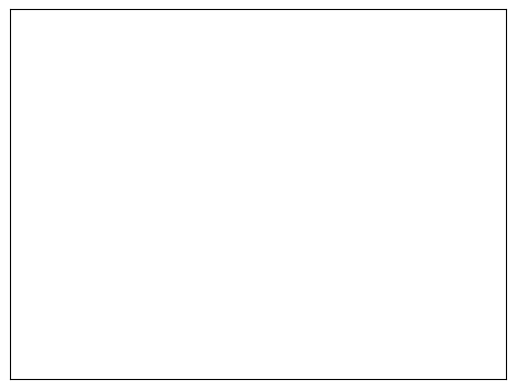

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


"""
This version has no trail lines.
This python3 program simulates the movement of a 2D gas based on momentum conservation
Coloumbic interactions are not considered

Datasets:

positions: np.zeros((num_particles, 2, num_steps))    x,y positions for each particle for each step number

col_mat=np.zeros((num_particles, num_particles), dtype=bool)  collision matrix, checks if particle collisions have been accounted for in each step

particles: dictionary of all Particle class objects
"""

def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0

class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 1.3*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 700
time_step = 0.1
num_steps = 1000
max_vel=0.2
force = np.array([0, 0])  


# Initialize datasets
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2),
        i=i
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for j in range(num_steps):
    
    
    col_mat=np.zeros((num_particles, num_particles), dtype=bool)
    update_check = np.zeros((num_particles),dtype=bool)
    
    for i in range(num_particles):
        
        cvar = particles[f"x{i}"]
        cvar.apply_force(force,time_step)
        
        # Check for collisions with other particles
        for k in range(i + 1, num_particles):
            if not (col_mat[i, k] or k==i):
                particles[f"x{i}"].check_collision(particles[f"x{k}"], col_mat, i, k)

        cvar.update_position(cvar.position, cvar.velocity, time_step)
        
        positions[i, 0, j] = cvar.position[0]
        positions[i, 1, j] = cvar.position[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5, zorder=2)[0] for _ in range(num_particles)]  # Particle markers

# Initialization function
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Animation function
def animate(i):
    for j, line in enumerate(lines):
        x = positions[j, 0, :i+1]
        y = positions[j, 1, :i+1]
        line.set_data([positions[j, 0, i]], [positions[j, 1, i]])  # Update particle position as single-element lists
    return lines 

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=np.arange(num_steps), interval=25, blit=False)

# Save the animation
ani.save('/Users/henryschnieders/downloads/animation_2_nolines.mp4')


# Adding a force pulse to create sound waves

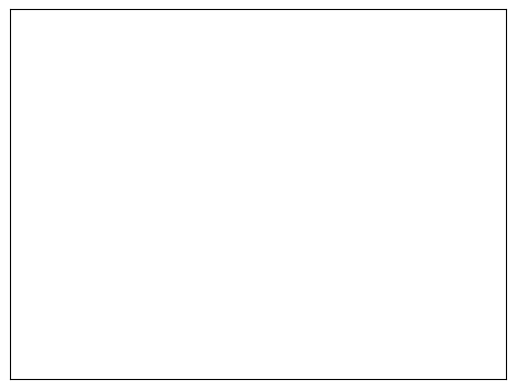

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


"""
This version has no trail lines.
This python3 program simulates the movement of a 2D gas based on momentum conservation
Coloumbic interactions between the gas species are not considered

Datasets:

positions: np.zeros((num_particles, 2, num_steps))    x,y positions for each particle for each step number

col_mat=np.zeros((num_particles, num_particles), dtype=bool)  collision matrix, checks if particle collisions have been accounted for in each step

particles: dictionary of all Particle class objects
"""

def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0


class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    def force_field(self, num_steps, step_num, time_step, pulse_num=1,dist='other',location=0.3, pulse_strength=1):
        #just define where it is, and if its true or not
        #to use existing apply_force()

        if dist=='evenly spread':
            hits=[int(base*num_steps/pulse_num) for base in range(1,pulse_num+1)]
            
            if step_num in hits:
    
                #let pulse area be right side of the figure
                if self.position[0]>1-location:
                    self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
            return

        else:
            hits=[int(0.05*num_steps)]

            if step_num in hits:
    
                #let pulse area be right side of the figure
                if self.position[0]>1-location:
                    self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
            return

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 1.3*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 800
time_step = 0.1
num_steps = 1000
max_vel=0.2
force = np.array([0, 0])  


# Initialize datasets
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2),
        i=i
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for step_num in range(num_steps):
    
    
    col_mat=np.zeros((num_particles, num_particles), dtype=bool)
    update_check = np.zeros((num_particles),dtype=bool)
    
    for part1 in range(num_particles):
        
        cvar = particles[f"x{part1}"]

        #apply general force if there is any
        cvar.apply_force(force,time_step)

        #apply pulse if there is any
        cvar.force_field(num_steps, step_num, time_step)

        # Check for collisions with other particles
        for part2 in range(part1 + 1, num_particles):
            if not (col_mat[part1, part2] or part2==part1):
                particles[f"x{i}"].check_collision(particles[f"x{part2}"], col_mat, part1, part2)

        
        cvar.update_position(cvar.position, cvar.velocity, time_step)
        
        positions[part1, 0, step_num] = cvar.position[0]
        positions[part1, 1, step_num] = cvar.position[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5, zorder=2)[0] for _ in range(num_particles)]  # Particle markers

# Initialization function
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Animation function
def animate(frame):
    for j, line in enumerate(lines):
        x = positions[j, 0, :frame+1]
        y = positions[j, 1, :frame+1]
        line.set_data([positions[j, 0, frame]], [positions[j, 1, frame]])  # Update particle position as single-element lists
    return lines 

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=np.arange(num_steps), interval=25, blit=False)

# Save the animation
ani.save('/Users/henryschnieders/downloads/animation_2_nolines_ff_slow.mp4')


# Pushing force

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


"""
This version has no trail lines.
This python3 program simulates the movement of a 2D gas based on momentum conservation
Spherical potentials of the gas species are not considered

Datasets:

positions: np.zeros((num_particles, 2, num_steps))    x,y positions for each particle for each step number

col_mat=np.zeros((num_particles, num_particles), dtype=bool)  collision matrix, checks if particle collisions have been accounted for in each step

particles: dictionary of all Particle class objects
"""

def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0


class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    def force_field(self, num_steps, step_num, time_step, pulse_num=1,dist='other',location=0.3, pulse_strength=1):
        #just define where it is, and if its true or not
        #to use existing apply_force()

        if dist=='evenly spread':
            hits=[int(base*num_steps/pulse_num) for base in range(1,pulse_num+1)]
            
            if step_num in hits:
    
                #let pulse area be right side of the figure
                if self.position[0]>1-location:
                    self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
            return

        else:
            hits=[int(0.05*num_steps)]

            if step_num in hits:
    
                #let pulse area be right side of the figure
                if self.position[0]>1-location:
                    self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
            return

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 1.3*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 800
time_step = 0.1
num_steps = 1000
max_vel=0.2
force = np.array([0, 0])  


# Initialize datasets
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2),
        i=i
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for step_num in range(num_steps):
    
    
    col_mat=np.zeros((num_particles, num_particles), dtype=bool)
    update_check = np.zeros((num_particles),dtype=bool)
    
    for part1 in range(num_particles):
        
        cvar = particles[f"x{part1}"]

        #apply general force if there is any
        cvar.apply_force(force,time_step)

        #apply pulse if there is any
        cvar.force_field(num_steps, step_num, time_step)

        # Check for collisions with other particles
        for part2 in range(part1 + 1, num_particles):
            if not (col_mat[part1, part2] or part2==part1):
                particles[f"x{i}"].check_collision(particles[f"x{part2}"], col_mat, part1, part2)

        
        cvar.update_position(cvar.position, cvar.velocity, time_step)
        
        positions[part1, 0, step_num] = cvar.position[0]
        positions[part1, 1, step_num] = cvar.position[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5, zorder=2)[0] for _ in range(num_particles)]  # Particle markers

# Initialization function
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Animation function
def animate(frame):
    for j, line in enumerate(lines):
        x = positions[j, 0, :frame+1]
        y = positions[j, 1, :frame+1]
        line.set_data([positions[j, 0, frame]], [positions[j, 1, frame]])  # Update particle position as single-element lists
    return lines 

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=np.arange(num_steps), interval=25, blit=False)

# Save the animation
ani.save('/Users/henryschnieders/downloads/animation_2_nolines_ff_slow.mp4')


# Gravity With Path Tracing

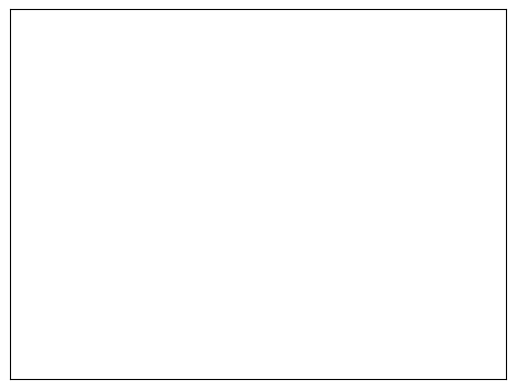

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


"""
This version has no trail lines.
This python3 program simulates the movement of a 2D gas based on momentum conservation
Coloumbic interactions between the gas species are not considered

Datasets:

positions: np.zeros((num_particles, 2, num_steps))    x,y positions for each particle for each step number

col_mat=np.zeros((num_particles, num_particles), dtype=bool)  collision matrix, checks if particle collisions have been accounted for in each step

particles: dictionary of all Particle class objects
"""

def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0


class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    # def force_field(self, num_steps, step_num, time_step, pulse_num=1,dist='other',location=0.3, pulse_strength=1):
    #     #just define where it is, and if its true or not
    #     #to use existing apply_force()

    #     if dist=='evenly spread':
    #         hits=[int(base*num_steps/pulse_num) for base in range(1,pulse_num+1)]
            
    #         if step_num in hits:
    
    #             #let pulse area be right side of the figure
    #             if self.position[0]>1-location:
    #                 self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
    #         return

    #     else:
    #         hits=[int(0.05*num_steps)]

    #         if step_num in hits:
    
    #             #let pulse area be right side of the figure
    #             if self.position[0]>1-location:
    #                 self.apply_force(pulse_strength*(np.array([-1,0])), time_step)
    #         return

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 1.3*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return
        
# Parameters
mass = 1.0
num_particles = 100
time_step = 0.1
num_steps = 1000
max_vel=0.2

#Gravity
force = np.array([0, -0.05])  


# Initialize datasets
particles = {}
for i in range(num_particles):
    particles[f"x{i}"] = Particle(
        mass=mass, 
        position=np.random.rand(2), 
        velocity=max_vel * np.random.rand() * np.random.rand(2),
        i=i
    )

positions = np.zeros((num_particles, 2, num_steps))

# Simulate particle movement
for step_num in range(num_steps):
    
    
    col_mat=np.zeros((num_particles, num_particles), dtype=bool)
    update_check = np.zeros((num_particles),dtype=bool)
    
    for part1 in range(num_particles):
        
        cvar = particles[f"x{part1}"]

        #apply general force if there is any
        cvar.apply_force(force,time_step)

        #apply pulse if there is any
        #cvar.force_field(num_steps, step_num, time_step)

        # Check for collisions with other particles
        for part2 in range(part1 + 1, num_particles):
            if not (col_mat[part1, part2] or part2==part1):
                particles[f"x{i}"].check_collision(particles[f"x{part2}"], col_mat, part1, part2)

        
        cvar.update_position(cvar.position, cvar.velocity, time_step)
        
        positions[part1, 0, step_num] = cvar.position[0]
        positions[part1, 1, step_num] = cvar.position[1]

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Create initial plot elements
lines = [ax.plot([], [], 'bo-', markersize=5, zorder=2)[0] for _ in range(num_particles)]  # Particle markers
trails = [ax.plot([], [], 'g-', alpha=0.5, linewidth=0.3, zorder=1)[0] for _ in range(num_particles)]  # Trails

# Initialization function
def init():
    for line, trail in zip(lines, trails):
        line.set_data([], [])
        trail.set_data([], [])
    return lines + trails

# Animation function
def animate(i):
    for j, (line, trail) in enumerate(zip(lines, trails)):
        x = positions[j, 0, :i+1]
        y = positions[j, 1, :i+1]
        trail.set_data(x, y)  # Update trail
        line.set_data([positions[j, 0, i]], [positions[j, 1, i]])  # Update particle position as single-element lists
    return lines + trails

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=np.arange(num_steps), interval=25, blit=False)

ani.save('/Users/henryschnieders/downloads/animation_lines_gravity.mp4')

In [9]:
def are_particles_approaching(rel_pos, vel1, vel2):
   
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    
    return dot_product > 0

class Particle:
    
    def __init__(self, mass, position, velocity, i):
        #define all class attributes
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i=i

    def __delta_check(self, position, velocity, time_step, p_rad): 

        pad_size=3*p_rad
        
        #if particle is in some range between the boundary, check to see if it will fall out
        for i in range(2):

            delta=self.velocity[i]*time_step
            
            if self.position[i]<pad_size:
                if delta<-3*p_rad:
                    
                    self.position[i]=delta-self.position[i]
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True

            if self.position[i]>1-pad_size:
                if delta>3*p_rad:

                    self.position[i]=1-(delta-self.position[i])
                    self.position[1-i]+=self.velocity[1-i]*time_step
                    
                    self.velocity[i]=-self.velocity[i]

                    return True
                    
        
    def update_position(self, position,velocity,time_step):
        
        p_rad=0.01470588

        if self.__delta_check(position, velocity, time_step, p_rad)==True:
            return
        
        
        self.position += self.velocity * time_step
        
        # Check for collisions with the grid edges
        for i in range(2):  # Check x and y components
            
            if self.position[i] < 0+2*p_rad:
                if self.velocity[i] <0:
                    self.velocity[i] = -self.velocity[i]  # Reflect the velocity
                    return

            if self.position[i] > 1-2*p_rad:
                if self.velocity[i] >0:
                    self.velocity[i] = -self.velocity[i]
                    return


    def apply_force(self, force, time_step):
        # Update velocity based on force (F = ma)
        acceleration = force / self.mass
        self.velocity += acceleration * time_step
        # Update position after applying force

    def check_collision(self,other,col_mat,i,k):
        
        col_axis=self.position-other.position
        magnitude=np.linalg.norm(col_axis)
        p_rad=0.01470588
        
        if (magnitude <= 1.3*p_rad):
            if are_particles_approaching(rel_pos=col_axis,vel1=self.velocity,vel2=other.velocity)==True:
        
                ucol_axis=col_axis/magnitude
    
                #self component
                #smag+omag=(smag-omag)/v_2,1 +v_2,1
                
                #mv_1,0 + mv_2,0 = mv_1,1 + mv_2,1
                #coefficient of restitution set to 1
                #thus, smag-vmag=-(v_1,1-v_2,1)
        
                smag=np.dot(ucol_axis,self.velocity)
                omag=np.dot(ucol_axis,other.velocity)
                
                omag_out=smag
                smag_out=omag
        
                self.velocity, other.velocity = (smag_out*(ucol_axis)+(self.velocity-smag*ucol_axis)), (omag_out*(ucol_axis)+(other.velocity-omag*ucol_axis))
                # Mark the collision as handled
                col_mat[i, k] = True
                col_mat[k, i] = True  # S
        return


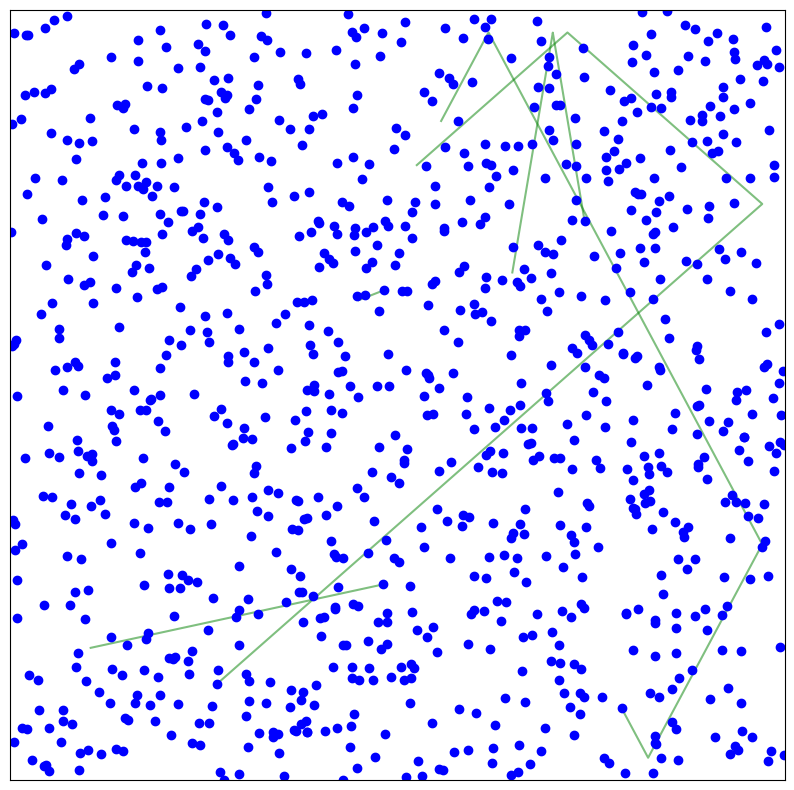

In [24]:


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

mass = 1
num_steps = 2000
time_step = 0.1
force = np.array([0, 0])
particles={}
num_particles= 1000
for i in range(num_particles):
    if i < 5:
        particles[f"x{i}"]=Particle(mass=mass, 
                                    position=np.array([np.random.rand(), np.random.rand()]), 
                                    velocity=0.01*np.random.rand()*np.array([np.random.rand(),np.random.rand()]),
                                    i = i)
    else:
        particles[f"x{i}"]=Particle(mass=mass, 
                            position=np.array([np.random.rand(), np.random.rand()]), 
                            velocity=0*np.random.rand()*np.array([np.random.rand(),np.random.rand()]),
                            i = i)

        

positions=np.zeros((num_particles,2,num_steps))

for j in range(num_steps):
    for i in range(num_particles):
        cvar = particles[f"x{i}"]
    
        # First update the velocity via force
        cvar.apply_force(force, time_step)
        
        # Then update the position using the updated velocity
        cvar.update_position(cvar.position, cvar.velocity, time_step)
        
        # Now record the new position in positions array
        loc = cvar.position.copy()
        positions[i, 0, j] = loc[0]
        positions[i, 1, j] = loc[1]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

def animate(i):
    ax.clear()  # Clear the axis to prevent flashing
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Update particle position and trail
    for particlesss in range(num_particles):
        x = [pos for pos in positions[particlesss,0,:i+1]]
        y = [pos for pos in positions[particlesss,1,:i+1]]
        ax.plot(x, y, 'g-', alpha=0.5)  # Trail
        ax.plot(positions[particlesss,0,i], positions[particlesss,1,i], 'bo-', zorder = 2)  # Particle
    
    return ax
   
    
ani = FuncAnimation(fig, animate, frames=num_steps, interval=2.5, blit=False)
ani.save('/Users/henryschnieders/downloads/animation.mp4')
plt.show()

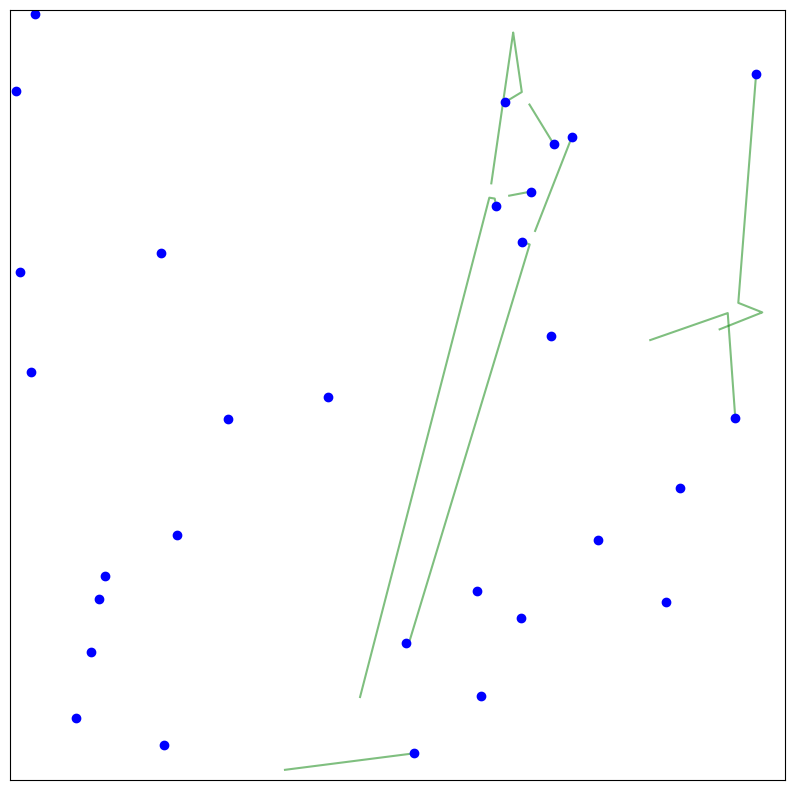

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# --- (Assume the Particle class and are_particles_approaching function are defined below) ---

def are_particles_approaching(rel_pos, vel1, vel2):
    rel_vel = np.array(vel2) - np.array(vel1)
    dot_product = np.dot(rel_pos, rel_vel)
    return dot_product > 0

class Particle:
    
    def __init__(self, mass, position, velocity, i):
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.i = i

    def __delta_check(self, position, velocity, time_step, p_rad): 
        pad_size = 3 * p_rad
        for i in range(2):
            delta = self.velocity[i] * time_step
            if self.position[i] < pad_size:
                if delta < -3 * p_rad:
                    self.position[i] = delta - self.position[i]
                    self.position[1 - i] += self.velocity[1 - i] * time_step
                    self.velocity[i] = -self.velocity[i]
                    return True
            if self.position[i] > 1 - pad_size:
                if delta > 3 * p_rad:
                    self.position[i] = 1 - (delta - self.position[i])
                    self.position[1 - i] += self.velocity[1 - i] * time_step
                    self.velocity[i] = -self.velocity[i]
                    return True

    def update_position(self, position, velocity, time_step):
        p_rad = 0.01470588
        if self.__delta_check(position, velocity, time_step, p_rad) == True:
            return
        self.position += self.velocity * time_step
        # Check for collisions with the grid edges
        for i in range(2):
            if self.position[i] < 0 + 2 * p_rad:
                if self.velocity[i] < 0:
                    self.velocity[i] = -self.velocity[i]
                    return
            if self.position[i] > 1 - 2 * p_rad:
                if self.velocity[i] > 0:
                    self.velocity[i] = -self.velocity[i]
                    return

    def apply_force(self, force, time_step):
        acceleration = force / self.mass
        self.velocity += acceleration * time_step

    def check_collision(self, other, col_mat, i, k):
        col_axis = self.position - other.position
        magnitude = np.linalg.norm(col_axis)
        p_rad = 0.01470588
        if magnitude <= 1.3 * p_rad:
            if are_particles_approaching(rel_pos=col_axis, vel1=self.velocity, vel2=other.velocity):
                ucol_axis = col_axis / magnitude
                smag = np.dot(ucol_axis, self.velocity)
                omag = np.dot(ucol_axis, other.velocity)
                omag_out = smag
                smag_out = omag
                self.velocity = smag_out * ucol_axis + (self.velocity - smag * ucol_axis)
                other.velocity = omag_out * ucol_axis + (other.velocity - omag * ucol_axis)
                col_mat[i, k] = True
                col_mat[k, i] = True
        return

# --- Simulation Setup ---

mass = 1
num_steps = 2000
time_step = 0.1
force = np.array([0, 0])
particles = {}
num_particles = 30

# Create particles: first 5 are moving; the rest are stationary.
for i in range(num_particles):
    if i < 5:
        particles[f"x{i}"] = Particle(
            mass=mass, 
            position=np.array([np.random.rand(), np.random.rand()]), 
            velocity=0.01 * np.random.rand() * np.array([np.random.rand(), np.random.rand()]),
            i=i)
    else:
        particles[f"x{i}"] = Particle(
            mass=mass, 
            position=np.array([np.random.rand(), np.random.rand()]), 
            velocity=0 * np.random.rand() * np.array([np.random.rand(), np.random.rand()]),
            i=i)

positions = np.zeros((num_particles, 2, num_steps))

for j in range(num_steps):
    # Update positions for all particles
    for i in range(num_particles):
        cvar = particles[f"x{i}"]
        cvar.apply_force(force, time_step)
        cvar.update_position(cvar.position, cvar.velocity, time_step)
        loc = cvar.position.copy()
        positions[i, 0, j] = loc[0]
        positions[i, 1, j] = loc[1]
    
    # Check for collisions between all pairs
    col_mat = np.zeros((num_particles, num_particles), dtype=bool)
    for i in range(num_particles):
        for k in range(i + 1, num_particles):
            particles[f"x{i}"].check_collision(particles[f"x{k}"], col_mat, i, k)

# --- Animation Code ---

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

def animate(i):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    for particlesss in range(num_particles):
        x = positions[particlesss, 0, :i+1]
        y = positions[particlesss, 1, :i+1]
        ax.plot(x, y, 'g-', alpha=0.5)  # Trail
        ax.plot(positions[particlesss, 0, i], positions[particlesss, 1, i], 'bo-', zorder=2)  # Particle
    return ax

ani = FuncAnimation(fig, animate, frames=num_steps, interval=2.5, blit=False)
ani.save('/Users/henryschnieders/downloads/animation.mp4')
plt.show()


Step 1 / 10000 done
Step 2001 / 10000 done
Step 4001 / 10000 done
Step 6001 / 10000 done
Step 8001 / 10000 done


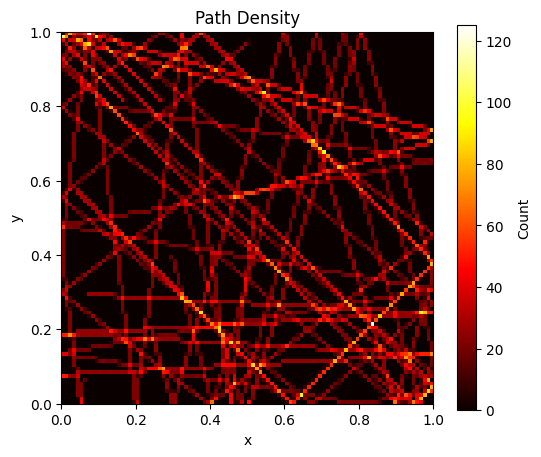

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, mass, position, velocity, i):
        self.mass = mass
        self.position = np.array(position, dtype=np.float64)
        self.velocity = np.array(velocity, dtype=np.float64)
        self.i = i

    def update_position(self, time_step):
        # Update position based on the current velocity.
        self.position += self.velocity * time_step

        # Reflect off boundaries (domain is [0, 1] in both x and y).
        for idx in range(2):
            if self.position[idx] < 0:
                self.position[idx] = -self.position[idx]
                self.velocity[idx] = -self.velocity[idx]
            elif self.position[idx] > 1:
                self.position[idx] = 2 - self.position[idx]
                self.velocity[idx] = -self.velocity[idx]

    def apply_force(self, force, time_step):
        # Update velocity based on F = m * a, so a = F/m.
        acceleration = force / self.mass
        self.velocity += acceleration * time_step


# ---------------------- Simulation Parameters ---------------------- #
num_particles = 10     # Number of particles
num_steps = 10000      # Number of simulation time steps
time_step = 0.01       # Time increment for each simulation step
grid_size = 100        # Size of the path density grid (grid_size x grid_size)
mass = 1.0             # Mass of each particle
lo_speed = 0.1         # A scaling factor for the initial velocity
force = np.array([0.0, 0.0])  # No external force for now


# ---------------------- Particle Initialization ---------------------- #
particles = {}
for i in range(num_particles):
    # Random initial position in [0, 1] for both x and y.
    position = np.random.rand(2)
    # Random initial velocity; the value of lo_speed controls the magnitude.
    velocity = lo_speed * (np.random.rand(2) - 0.5)
    particles[f"x{i}"] = Particle(mass, position, velocity, i)


# ---------------------- Create the Path Density Grid ---------------------- #
path_density = np.zeros((grid_size, grid_size))


# ---------------------- Simulation Loop ---------------------- #
for step in range(num_steps):
    for i in range(num_particles):
        p = particles[f"x{i}"]
        # (Optional) apply a force if needed
        p.apply_force(force, time_step)
        # Update the particle's position.
        p.update_position(time_step)
        
        # Convert the position (in [0, 1]) to grid indices.
        loc = p.position
        grid_x = min(max(int(loc[0] * grid_size), 0), grid_size - 1)
        grid_y = min(max(int(loc[1] * grid_size), 0), grid_size - 1)
        path_density[grid_y, grid_x] += 1

    if step % 2000 == 0:
        print(f"Step {step + 1} / {num_steps} done")


# ---------------------- Plotting the Path Density ---------------------- #
plt.figure(figsize=(6, 5))
plt.imshow(path_density, origin='lower', cmap='hot', extent=[0, 1, 0, 1])
plt.title("Path Density")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Count")
plt.show()
